# Examples of plottingTools
1. [Tried-and-true ShapeMapper2 plots](#SM2_plots)
2. [Skyline plots to compare multiple profiles](#Skyline_plots)
3. [Adding a Sequence Identity bar](#Seq_bar)

In [1]:
# Hide code by default in HTML and provide a toggle button

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [46]:
# Set up Python environment and plotting defaults

%matplotlib inline

import plottingTools as pt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("ticks")
sns.set_context("talk")
colors = ['#a100ff', '#ebc300', '#20D600', '#FF00E1', '#0084D7', '#FF8300']
colors2 = ['#7F3C8D','#E68310','#11A579','#3969AC',          '#F2B701','#E73F74','#80BA5A','#008695',          '#CF1C90','#f97b72','#4b4b8f','#A5AA99']
colors3 = ['#a100ffff', '#edc600ff', '#0092edff', '#ff8300ff', '#ff48e9ff', '#3fd125ff']
sns.set_palette(colors)

In [47]:
sample = pd.read_csv('DMS_1_rnasep_profile.txt', sep='\t')

sample1 = sample.copy()
sample1['Modified_rate']*=1.05
sample1['Untreated_rate']*=1.2

sample2 = sample.copy()
sample2['Modified_rate']*=1.1
sample2['Untreated_rate']*=1.2


<a id='SM2_plots'></a>
## Tried-and-true ShapeMapper2 plots
These will look slightly different from the pdf versions until I work out the kinks.

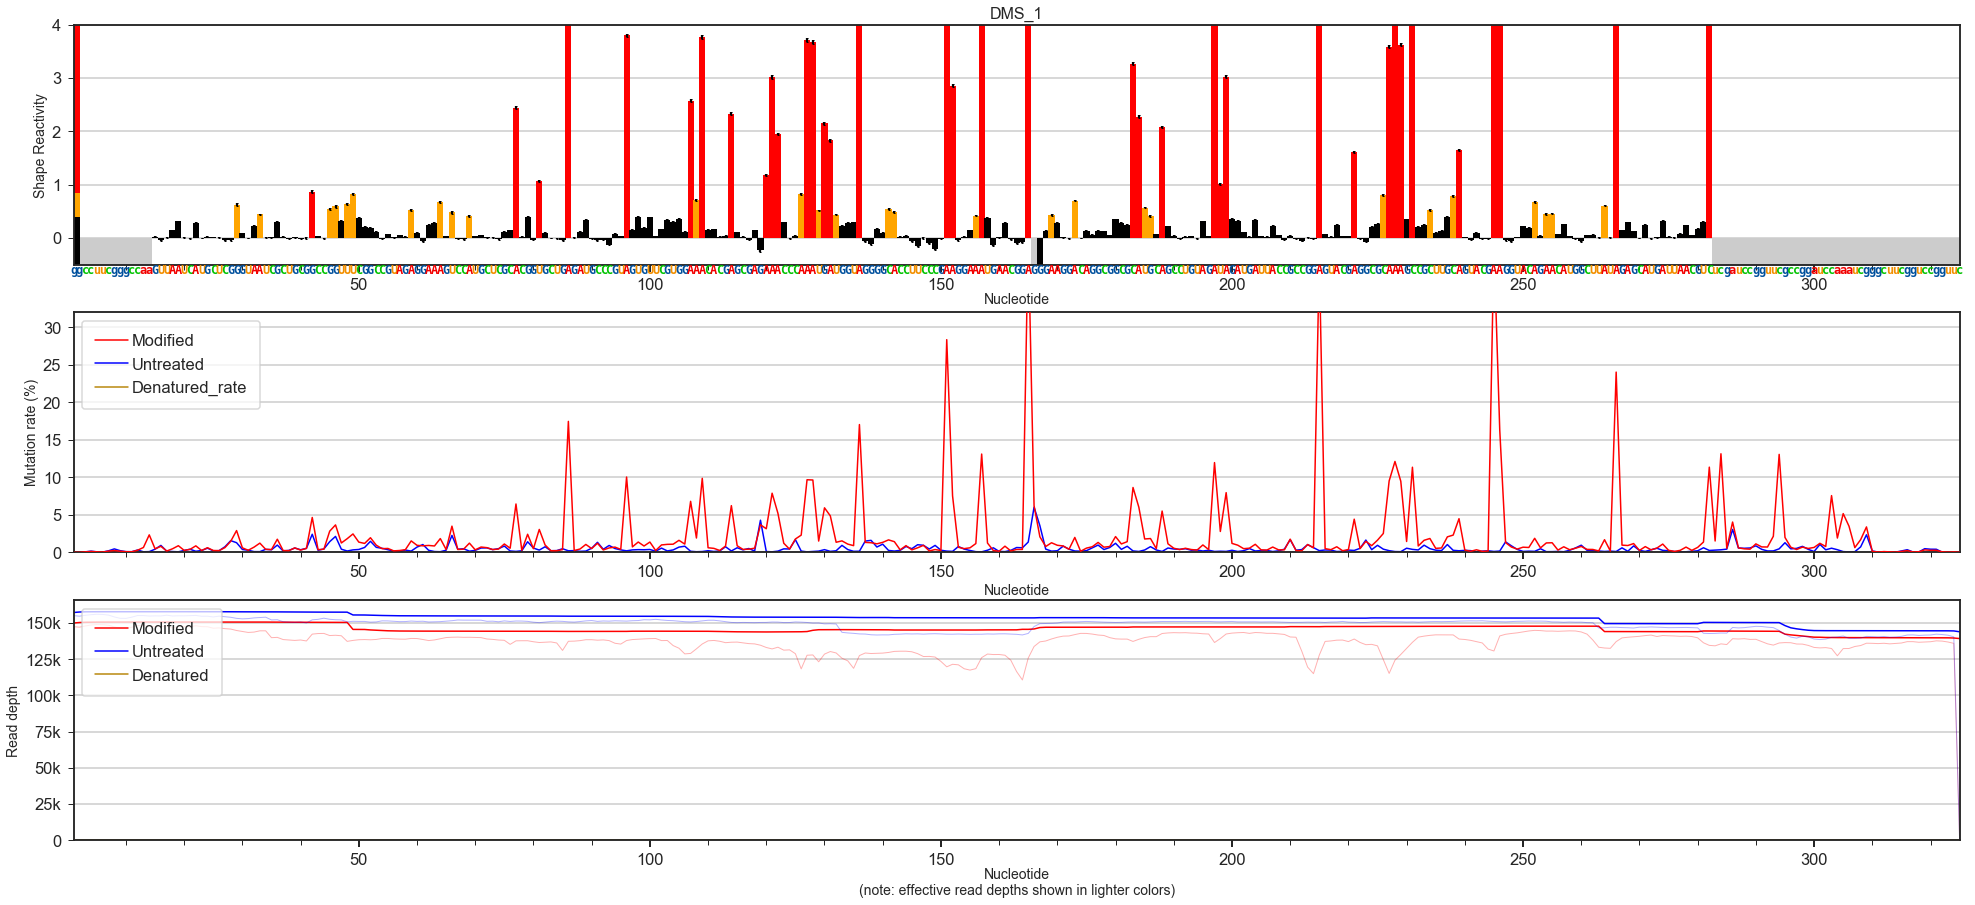

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(pt.getWidth(sample), 15))
pt.plotProfile(ax[0], sample, 'DMS_1')
pt.plotMutationRates(ax[1], sample)
pt.plotDepth(ax[2], sample)

<a id='Skyline_plots'></a>
## Skyline plots to compare multiple profiles
This type of plot makes it easier to compare profiles.

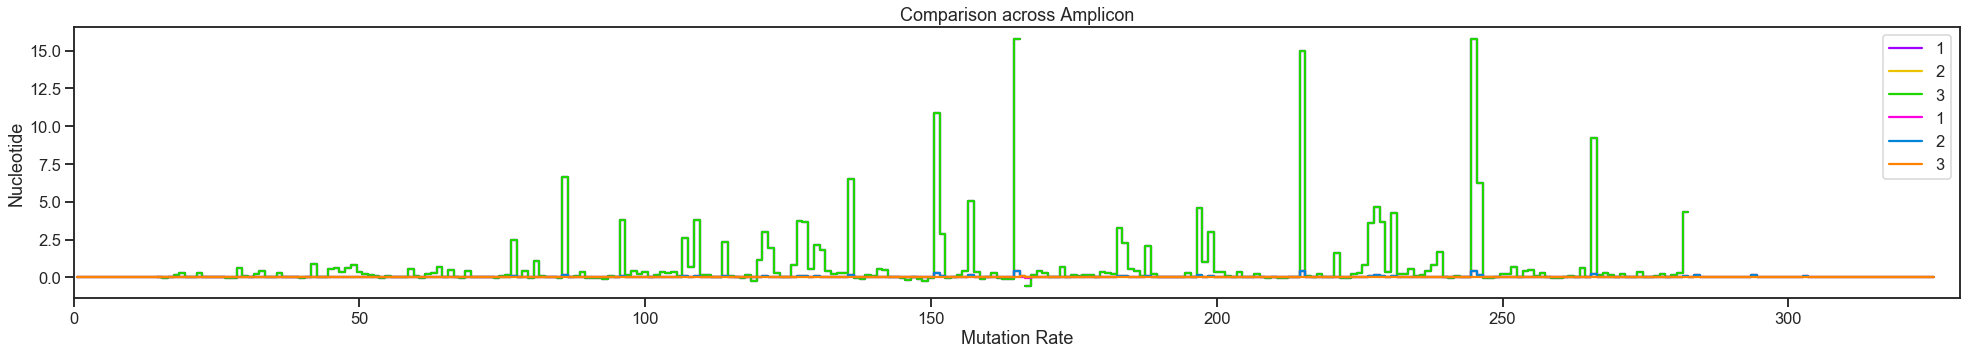

In [49]:
fig, ax = plt.subplots(1, figsize=(pt.getWidth(sample), 5))

pt.plotSkyline(ax, sample, '1', 'Norm_profile')
pt.plotSkyline(ax, sample, '2', 'Modified_rate')
pt.plotSkyline(ax, sample, '3', 'Norm_profile')

pt.plotSkyline(ax, sample, '1', 'Reactivity_profile')
pt.plotSkyline(ax, sample, '2', 'Modified_rate')
pt.plotSkyline(ax, sample, '3', 'Untreated_rate')

ax.legend()
ax.set(title="Comparison across Amplicon",
       xlim=(0,330),
       xlabel="Mutation Rate",
       ylabel="Nucleotide");

<a id='Seq_bar'></a>
## Sequence Identity bar
Use pt.addSeqBar to add a sequence to your figure.

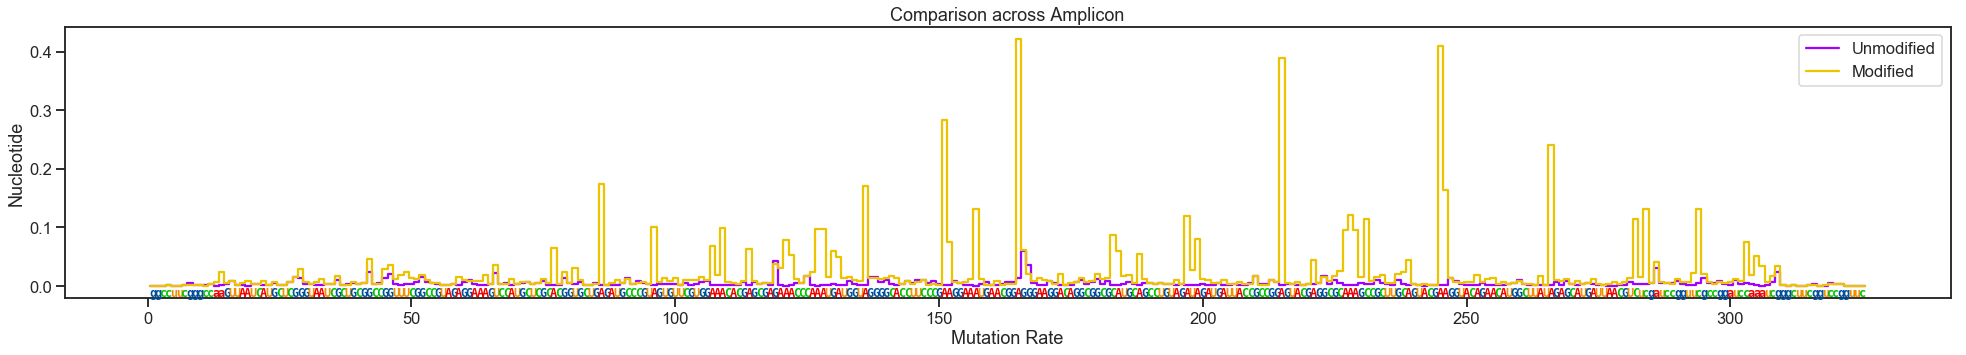

In [50]:
fig, ax = plt.subplots(1, figsize=(pt.getWidth(sample), 5))

pt.plotSkyline(ax, sample, 'Unmodified', 'Untreated_rate')
pt.plotSkyline(ax, sample, 'Modified', 'Modified_rate')
pt.addSeqBar(ax, sample)
ax.legend()
ax.set(title="Comparison across Amplicon",
       xlabel="Mutation Rate",
       ylabel="Nucleotide");

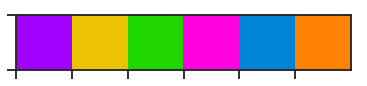

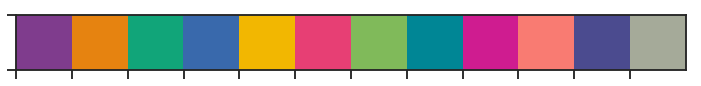

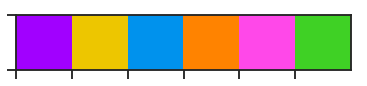

In [51]:
sns.palplot(colors)
sns.palplot(colors2)
sns.palplot(colors3)

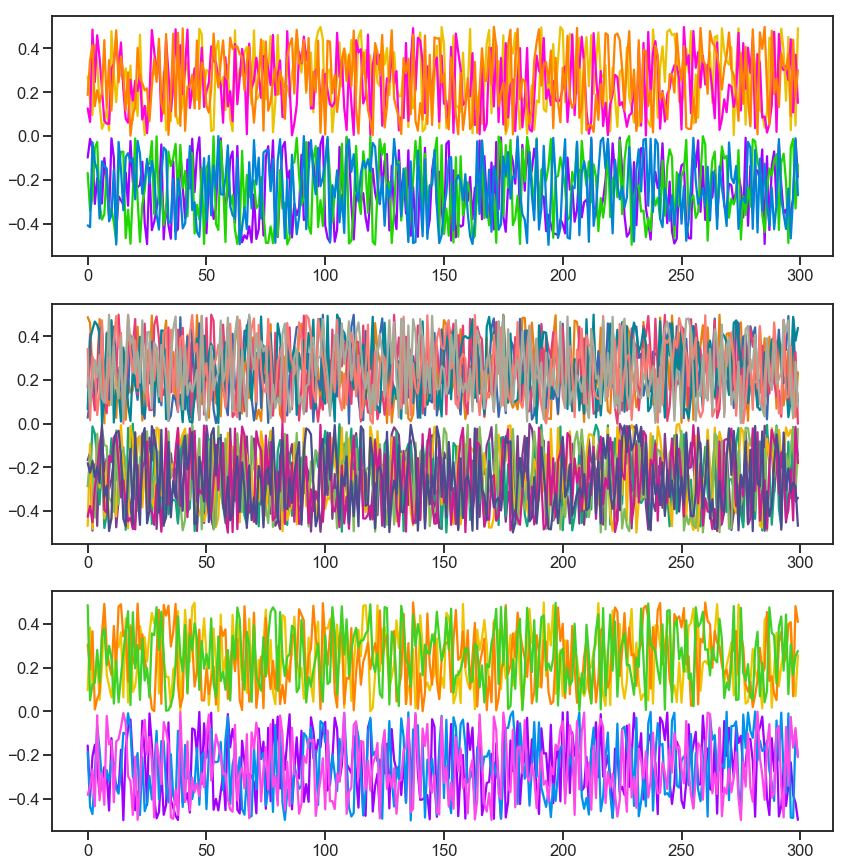

In [61]:
fig, ax = plt.subplots(3, 1, figsize=(14,15))
for a, colorset in enumerate([colors, colors2, colors3]):
    for i, color in enumerate(colorset):
        ax[a].plot(np.arange(0,300), np.random.random(size=300)*(i%2-0.5), color=color)
    
    